In [1]:
#Data Collector
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Data Visualization Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
sclaer = MinMaxScaler(feature_range=(0,1))

from fbprophet import Prophet

Using TensorFlow backend.
Importing plotly failed. Interactive plots will not work.


In [2]:
def change_date(datasets):
    datasets["Date"]=pd.to_datetime(datasets.Date, format="%Y-%m-%d")
    datasets.index=datasets['Date']
    #del datasets["Date"]

In [3]:
def change(column):
    buy_price=column[0]              
    cur_price=column[column.size-1]  
    price_change=(cur_price-buy_price)/buy_price  
    if price_change>0:
        print('Cumulative increase {}%'.format(round(price_change*100,2)))
    elif price_change<0:
        print('Cumulative decline {}%'.format(round(price_change*100,2)))
    else:
        print('No change in stock price')
    return price_change

In [4]:
def lstm(dataset):
    data=dataset.sort_index(ascending=True,axis=0)
    new_dataset=pd.DataFrame(index=range(0,len(dataset)),columns=['Date','Close'])

    for i in range(0,len(data)):
        new_dataset["Date"][i]=data['Date'][i]
        new_dataset["Close"][i]=data["Close"][i]

    new_dataset.index=new_dataset.Date
    new_dataset.drop("Date",axis=1,inplace=True)

    final_dataset=new_dataset.values
    train_data=final_dataset[0:300,:]
    valid_data=final_dataset[300:,:]

    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_data=scaler.fit_transform(final_dataset)

    x_train_data,y_train_data=[],[]

    for i in range(60,len(train_data)):
        x_train_data.append(scaled_data[i-60:i,0])
        y_train_data.append(scaled_data[i,0])

    x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
    x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

    lstm_model=Sequential()
    lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
    lstm_model.add(LSTM(units=50))
    lstm_model.add(Dense(1))

    inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
    inputs_data=inputs_data.reshape(-1,1)
    inputs_data=scaler.transform(inputs_data)

    lstm_model.compile(loss='mean_squared_error',optimizer='adam')
    lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

    X_test=[]
    for i in range(60,inputs_data.shape[0]):
        X_test.append(inputs_data[i-60:i,0])
    X_test=np.array(X_test)

    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    predicted_closing_price=lstm_model.predict(X_test)
    predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

    train_data=new_dataset[:300]
    valid_data=new_dataset[300:]
    valid_data['Predictions']=predicted_closing_price
    plt.figure(figsize=(16,8))
    plt.plot(train_data['Close'])
    plt.plot(valid_data['Close'])
    plt.plot(valid_data['Predictions'])
    plt.legend(["Train Close",'Vaild Close',"Predictions"], loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()

In [25]:
def Predict(pre_data, compare_data):
    pre_data = pre_data[["Date","Close"]]
    pre_data = pre_data.rename(columns = {"Date":"ds","Close":"y"})

    m = Prophet(daily_seasonality = True)
    m.fit(pre_data)

    future = m.make_future_dataframe(periods=200)
    forecast = m.predict(future)
    
    forecast["ds"]=pd.to_datetime(forecast.ds, format="%Y-%m-%d")
    forecast.index=forecast['ds']
    
    forecast['yhat_upper'].plot(legend=True,figsize=(16,8))
    pre_data['y'].plot(legend=True,figsize=(16,8))
    compare_data['Close'].plot(legend=True,figsize=(16,8))
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(['Highest Prediction Price', 'Actual Price','Future Actual Price'])
    plt.grid()
    
    buy_price=forecast['yhat_upper'][0]              
    cur_price=forecast['yhat_upper'][forecast['yhat_upper'].size-1]  
    price_change=(cur_price-buy_price)/buy_price  
    if price_change>0:
        print('Cumulative increase {}%'.format(round(price_change*100,2)))
    elif price_change<0:
        print('Cumulative decline {}%'.format(round(price_change*100,2)))
    else:
        print('No change in stock price')

In [6]:
Delta=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\A\\DAL.csv")
JetB=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\A\\JBLU.csv")
SAVE=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\A\\SAVE.csv")
ChinaS=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\A\\ZNH.csv")
BOA=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\F\\BAC.csv")
Citi=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\F\\C.csv")
JPM=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\F\\JPM.csv")
USB=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\F\\USB.csv")
Hyatt=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\H\\H.csv")
HuaZhu=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\H\\HTHT.csv")
IHG=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\H\\IHG.csv")
MAR=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\H\\MAR.csv")
AMGN=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\AMGN.csv")
CERN=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\CERN.csv")
MRNA=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\MRNA.csv")
PFE=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\PFE.csv")

In [7]:
Covid=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\Covid19.csv")

In [8]:
change_date(Delta)
change_date(JetB)
change_date(SAVE)
change_date(ChinaS)

change_date(BOA)
change_date(Citi)
change_date(JPM)
change_date(USB)

change_date(Hyatt)
change_date(HuaZhu)
change_date(IHG)
change_date(MAR)

change_date(AMGN)
change_date(CERN)
change_date(MRNA)
change_date(PFE)
change_date(Covid)

In [9]:
change(Delta['Close'])
change(JetB['Close'])
change(SAVE['Close'])
change(ChinaS['Close'])

Cumulative decline -28.52%
Cumulative decline -33.6%
Cumulative decline -45.46%
Cumulative decline -41.83%


-0.4182825599864947

In [10]:
change(BOA['Close'])
change(Citi['Close'])
change(JPM['Close'])
change(USB['Close'])

Cumulative increase 0.27%
Cumulative decline -18.15%
Cumulative increase 16.13%
Cumulative decline -14.58%


-0.14584484815555884

In [11]:
change(Hyatt['Close'])
change(HuaZhu['Close'])
change(IHG['Close'])
change(MAR['Close'])

Cumulative decline -0.23%
Cumulative increase 13.61%
Cumulative decline -4.31%
Cumulative decline -2.45%


-0.024523357009345822

In [12]:
change(AMGN['Close'])
change(CERN['Close'])
change(MRNA['Close'])
change(PFE['Close'])

Cumulative increase 28.34%
Cumulative increase 13.72%
Cumulative increase 627.77%
Cumulative increase 6.27%


0.06267733644018464

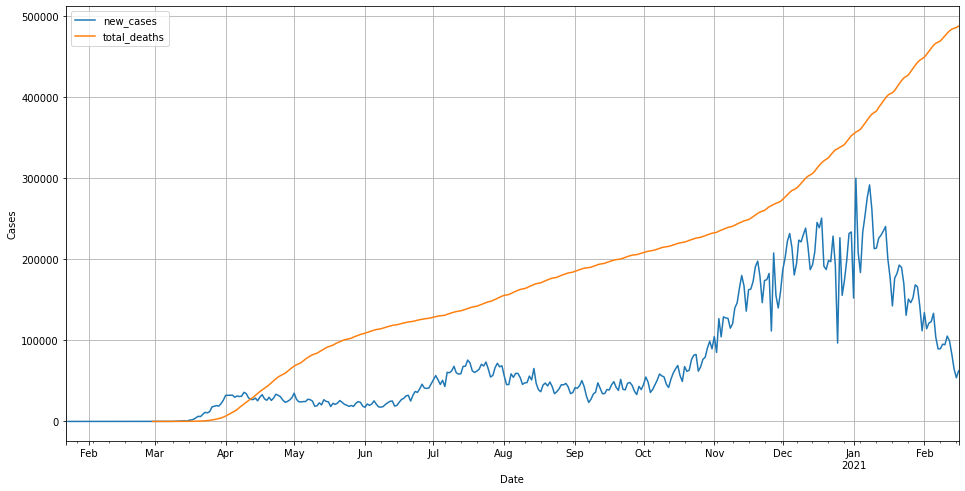

In [13]:
Covid['new_cases'].plot(legend=True,figsize=(16,8))
Covid['total_deaths'].plot(legend=True,figsize=(16,8))

plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(['new_cases', 'total_deaths'])
plt.grid()

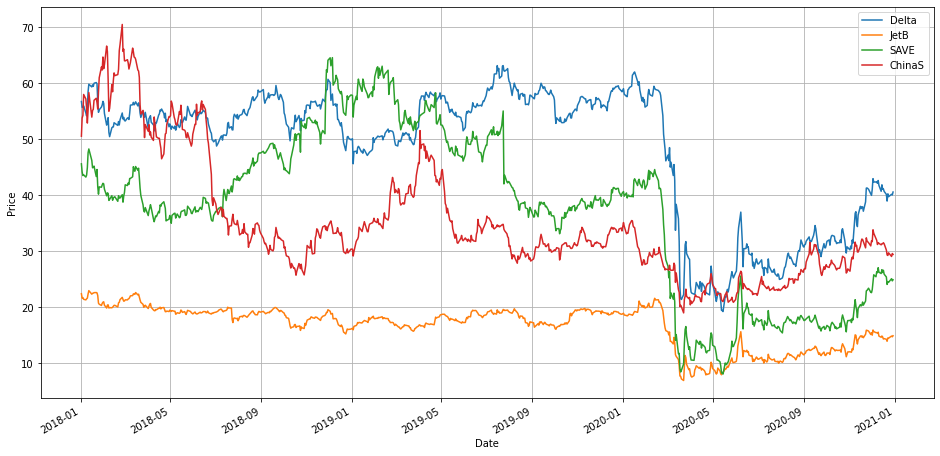

In [14]:
Delta['Close'].plot(legend=True,figsize=(16,8))
JetB['Close'].plot(legend=True,figsize=(16,8))
SAVE['Close'].plot(legend=True,figsize=(16,8))
ChinaS['Close'].plot(legend=True,figsize=(16,8))

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Delta', 'JetB','SAVE','ChinaS'])
plt.grid()

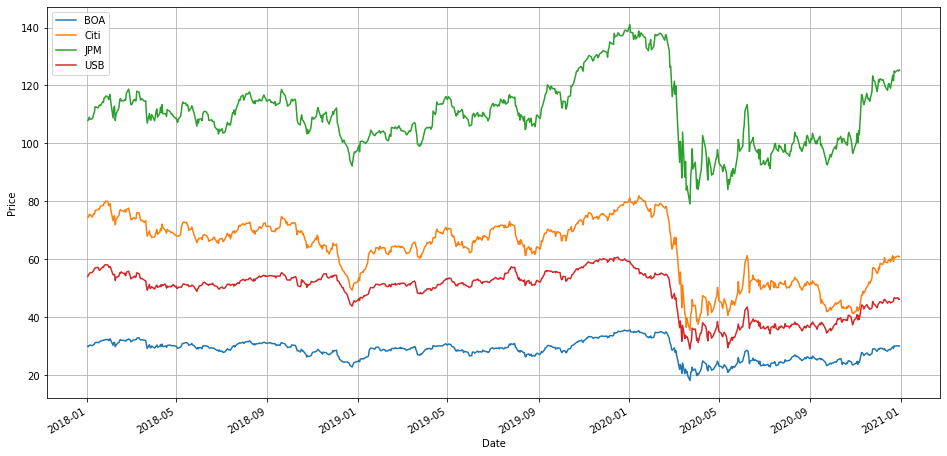

In [15]:
BOA['Close'].plot(legend=True,figsize=(16,8))
Citi['Close'].plot(legend=True,figsize=(16,8))
JPM['Close'].plot(legend=True,figsize=(16,8))
USB['Close'].plot(legend=True,figsize=(16,8))

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['BOA', 'Citi','JPM','USB'])
plt.grid()

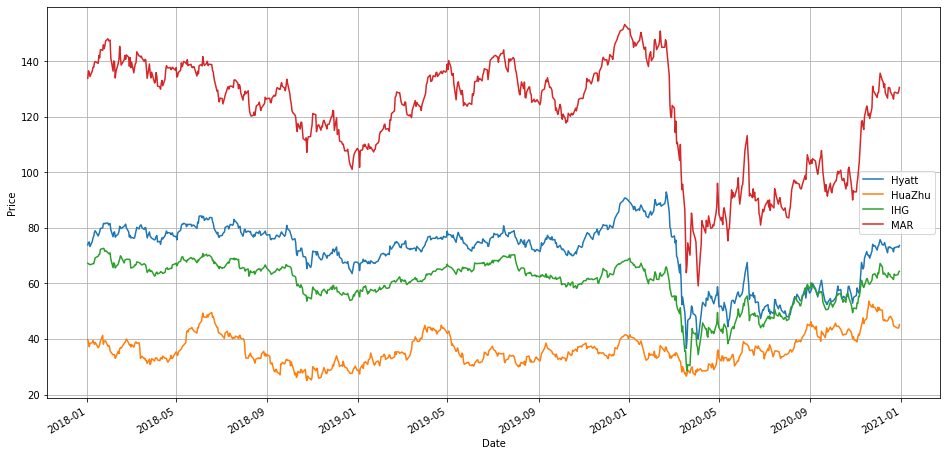

In [16]:
Hyatt['Close'].plot(legend=True,figsize=(16,8))
HuaZhu['Close'].plot(legend=True,figsize=(16,8))
IHG['Close'].plot(legend=True,figsize=(16,8))
MAR['Close'].plot(legend=True,figsize=(16,8))

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Hyatt', 'HuaZhu','IHG','MAR'])
plt.grid()

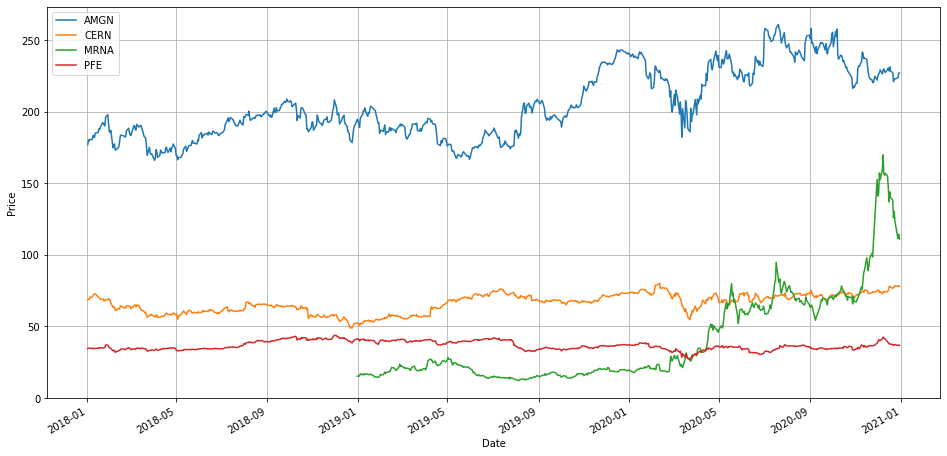

In [17]:
AMGN['Close'].plot(legend=True,figsize=(16,8))
CERN['Close'].plot(legend=True,figsize=(16,8))
MRNA['Close'].plot(legend=True,figsize=(16,8))
PFE['Close'].plot(legend=True,figsize=(16,8))

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['AMGN', 'CERN','MRNA','PFE'])
plt.grid()

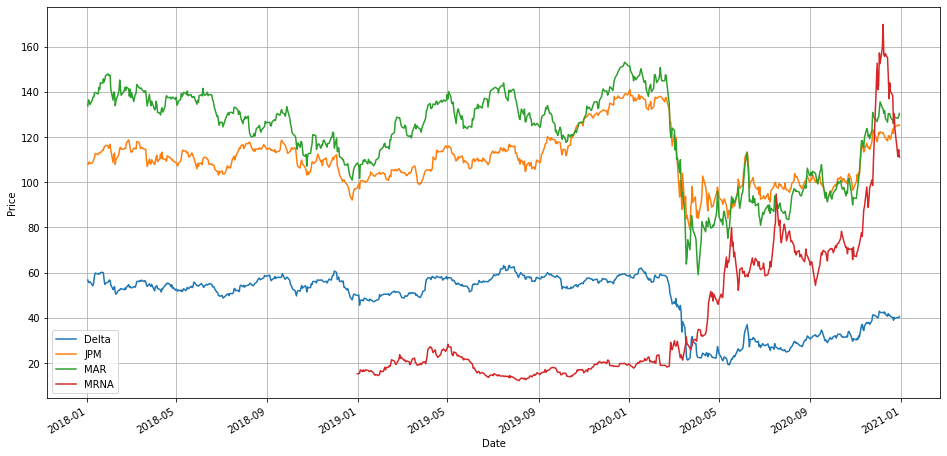

In [18]:
Delta['Close'].plot(legend=True,figsize=(16,8))
JPM['Close'].plot(legend=True,figsize=(16,8))
MAR['Close'].plot(legend=True,figsize=(16,8))
MRNA['Close'].plot(legend=True,figsize=(16,8))

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Delta', 'JPM','MAR','MRNA'])
plt.grid()

In [19]:
Delta_2021=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\A\\DAL_2021.csv")
MRNA_2021=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\MRNA_2021.csv")
JPM_2021=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\MRNA_2021.csv")
MAR_2021=pd.read_csv("C:\\Users\\71484\\Desktop\\Capstone Project\\DataSet\\M\\MRNA_2021.csv")

In [20]:
change_date(Delta_2021)
change_date(JPM_2021)
change_date(MAR_2021)
change_date(MRNA_2021)

Epoch 1/1
 - 5s - loss: 0.0127


C:\Users\71484\anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


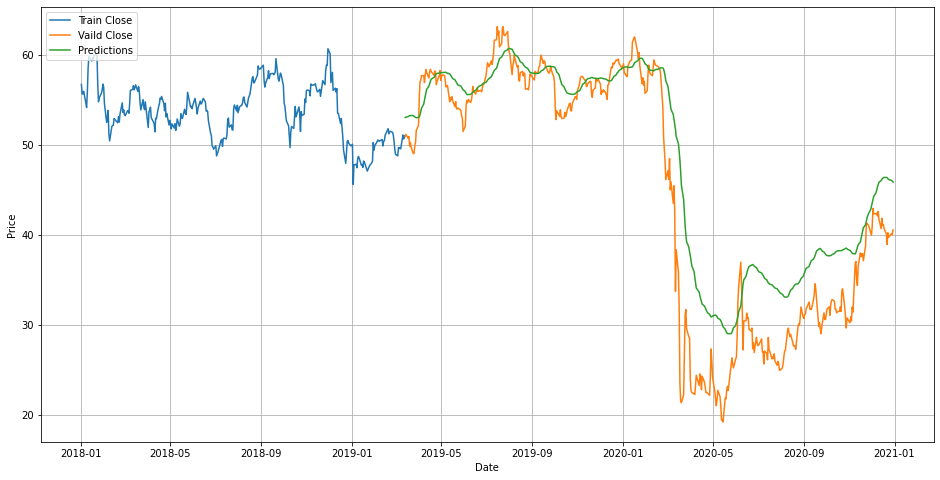

In [21]:
lstm(Delta)

Epoch 1/1
 - 5s - loss: 0.0059


C:\Users\71484\anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


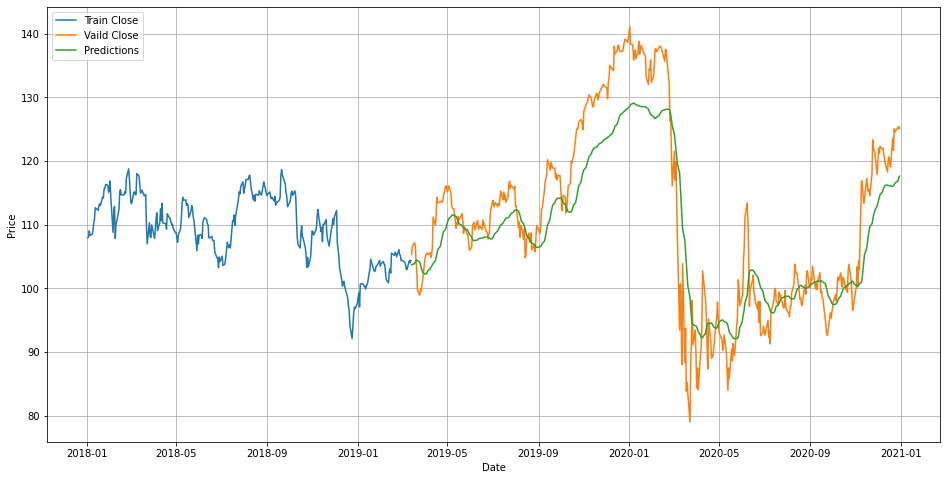

In [22]:
lstm(JPM)

Epoch 1/1
 - 4s - loss: 0.0137


C:\Users\71484\anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


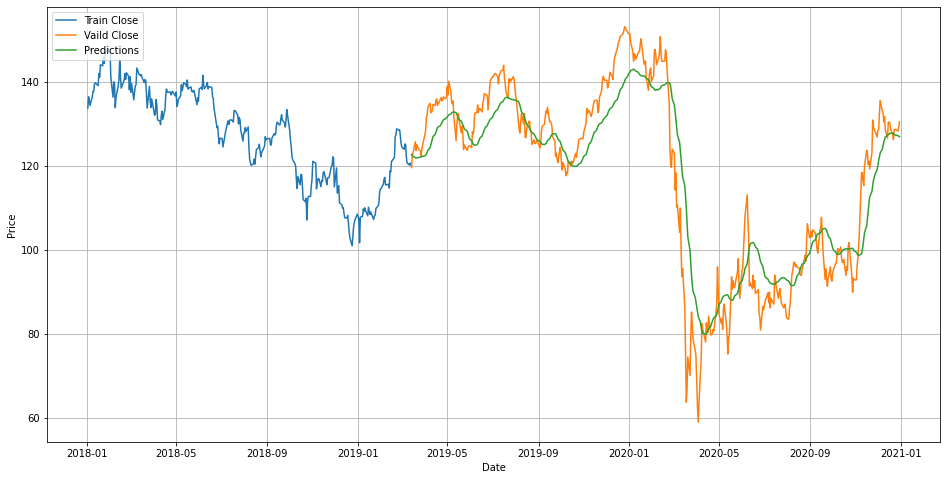

In [23]:
lstm(MAR)

Epoch 1/1
 - 5s - loss: 2.8751e-04


C:\Users\71484\anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


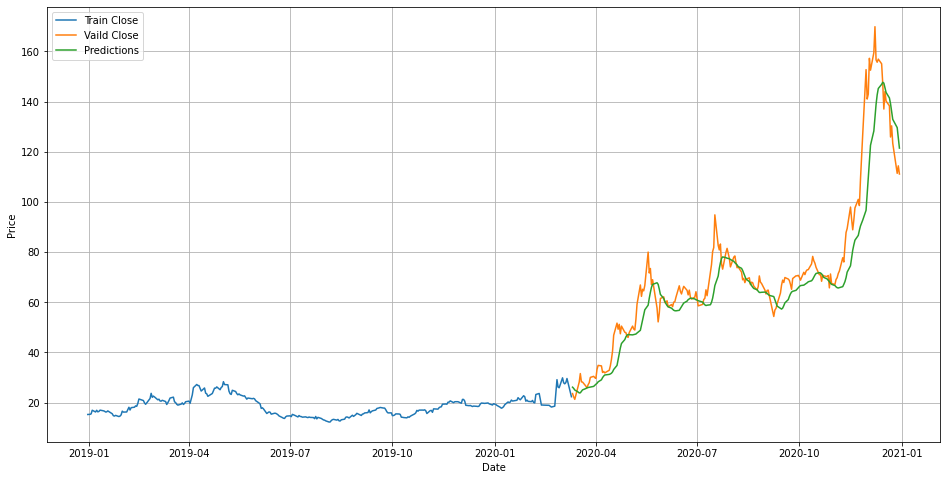

In [24]:
lstm(MRNA)

Cumulative increase 0.17%


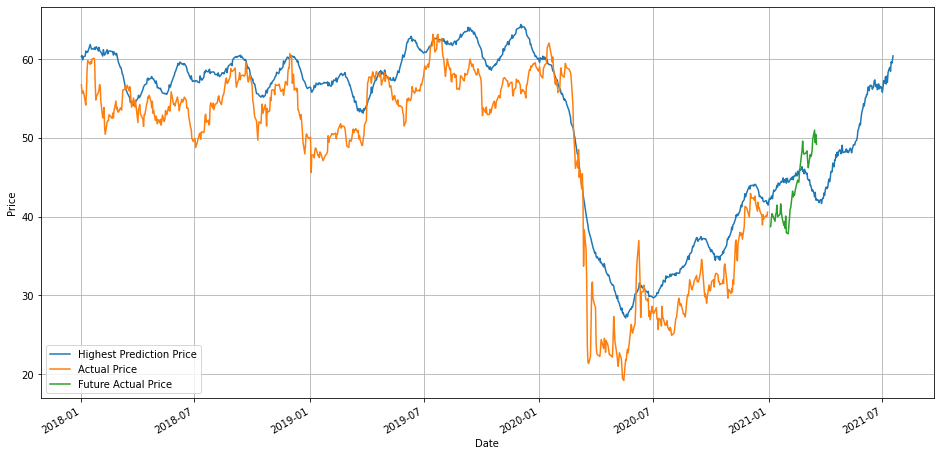

In [26]:
Predict(Delta, Delta_2021)

Cumulative increase 40.65%


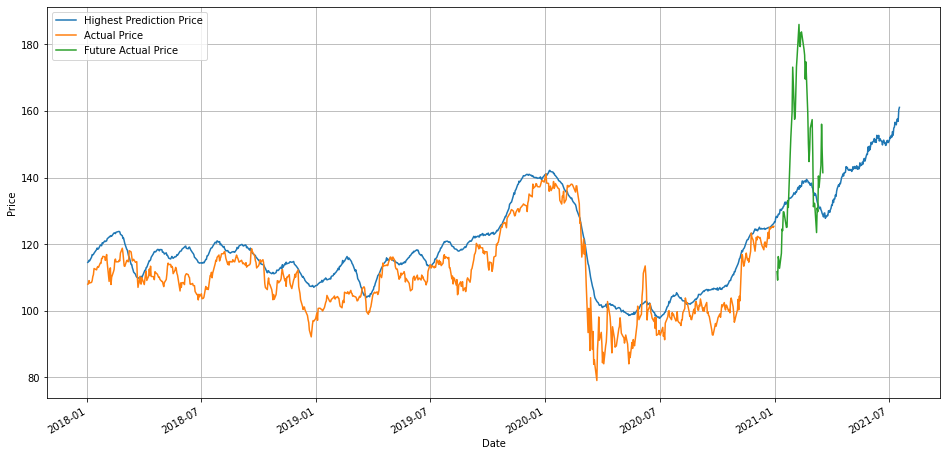

In [27]:
Predict(JPM, JPM_2021)

Cumulative increase 39.48%


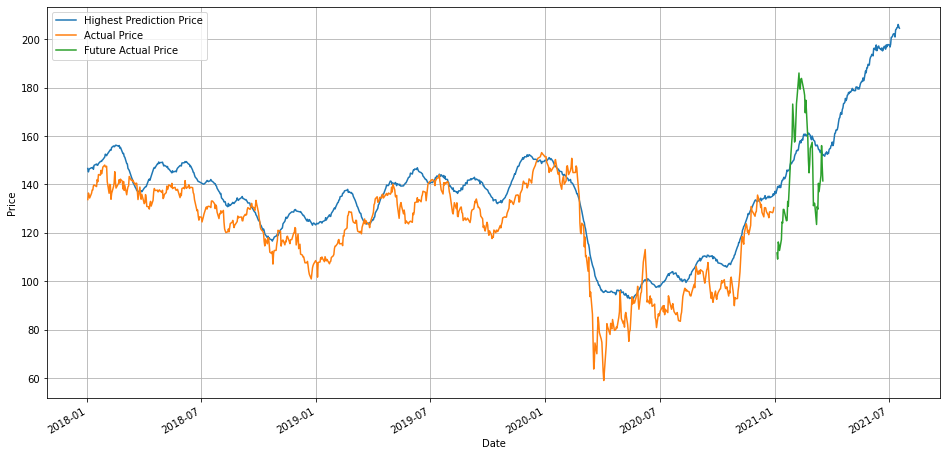

In [28]:
Predict(MAR, MAR_2021)

Cumulative increase 640.54%


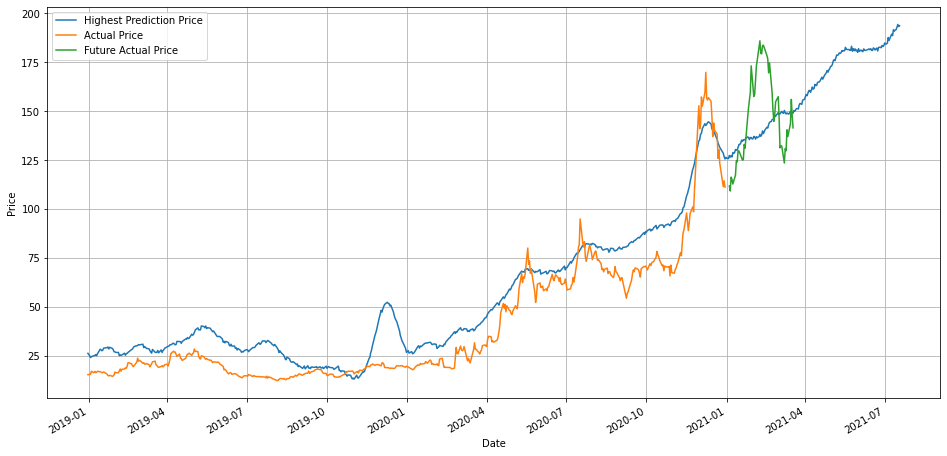

In [29]:
Predict(MRNA, MRNA_2021)